# Tabular Experiments -- Discretisation and Binarisation Purity #

The experiments are executed by selecting one of the data sets via uncommenting
its name in one of the notebook cells below.

In [1]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('text', usetex=True)
plt.style.use('seaborn')

%matplotlib inline

In [2]:
import numpy as np
import sklearn.datasets as skl_data

import helpers

22-May-08 16:06:59 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [3]:
data_sets = {
    'wine': {
        'data': skl_data.load_wine(return_X_y=True)[0],
        'labels': skl_data.load_wine(return_X_y=True)[1],
        'tree_leaves': 16,
        'is_classification': True
    },
    'breast_cancer': {
        'data': skl_data.load_breast_cancer(return_X_y=True)[0],
        'labels': skl_data.load_breast_cancer(return_X_y=True)[1],
        'tree_leaves': 32,
        'is_classification': True
    },
    'boston': {
        'data': skl_data.load_boston(return_X_y=True)[0],
        'labels': skl_data.load_boston(return_X_y=True)[1],
        'tree_leaves': 16,  # 32 # 16/64
        'is_classification': False
    },
    'diabetes': {
        'data': skl_data.load_diabetes(return_X_y=True)[0],
        'labels': skl_data.load_diabetes(return_X_y=True)[1],
        'tree_leaves': 32,  # 256 # 32/64/128
        'is_classification': False
    }
}

In [4]:
data_set = 'wine'
# data_set = 'breast_cancer'
# data_set = 'boston'
# data_set = 'diabetes'

In [5]:
discrete_result, binary_results, n_g, n_l = helpers.get_lime(
    data_sets[data_set]['data'],
    data_sets[data_set]['labels'],
    classification=data_sets[data_set]['is_classification'],
    distance_factor=0.6)

Global weighted homogeneity of discretisation: 0.0.
Unique discrete points count: 178.
Local weighted homogeneity of binarisation: 0.0565663550863917 +- 0.04171626963189558.
Unique binary points count: 124.25842696629213 +- 13.51281380214379.


In [6]:
print(f'Local: {n_l:d}; global: {n_g:d}.')

Local: 148; global: 178.


In [7]:
n_g_fn = 4**data_sets[data_set]['data'].shape[1]
n_l_fn = 2**data_sets[data_set]['data'].shape[1]

In [8]:
tree_global = helpers.get_tree_global(
    data_sets[data_set]['data'],
    data_sets[data_set]['labels'],
    data_sets[data_set]['tree_leaves'],
    classification=data_sets[data_set]['is_classification'])

Global weighted homogeneity of tree-based discretisation (16 leaves): 0.0.
Global weighted homogeneity of tree-based discretisation (15 leaves): 0.0.
Global weighted homogeneity of tree-based discretisation (14 leaves): 0.0.
Global weighted homogeneity of tree-based discretisation (13 leaves): 0.0.
Global weighted homogeneity of tree-based discretisation (12 leaves): 0.0.
Global weighted homogeneity of tree-based discretisation (11 leaves): 0.011235955056179775.
Global weighted homogeneity of tree-based discretisation (10 leaves): 0.011235955056179775.
Global weighted homogeneity of tree-based discretisation (9 leaves): 0.015248796147672553.
Global weighted homogeneity of tree-based discretisation (8 leaves): 0.01802222809191946.
Global weighted homogeneity of tree-based discretisation (7 leaves): 0.02283763740171079.
Global weighted homogeneity of tree-based discretisation (6 leaves): 0.033382149069817964.
Global weighted homogeneity of tree-based discretisation (5 leaves): 0.35360686

In [9]:
tree_local = helpers.get_tree_local(
    data_sets[data_set]['data'],
    data_sets[data_set]['labels'],
    data_sets[data_set]['tree_leaves'],
    classification=data_sets[data_set]['is_classification'],
    distance_factor=0.6)

Local weighted homogeneity of tree-based discretisation (16 leaves): 0.0 +- 0.0.
Local weighted homogeneity of tree-based discretisation (15 leaves): 0.0 +- 0.0.
Local weighted homogeneity of tree-based discretisation (14 leaves): 0.0 +- 0.0.
Local weighted homogeneity of tree-based discretisation (13 leaves): 0.0 +- 0.0.
Local weighted homogeneity of tree-based discretisation (12 leaves): 0.0 +- 0.0.
Local weighted homogeneity of tree-based discretisation (11 leaves): 0.004445064460295178 +- 0.005521706027519013.
Local weighted homogeneity of tree-based discretisation (10 leaves): 0.0044799587306559845 +- 0.0055131243302371305.
Local weighted homogeneity of tree-based discretisation (9 leaves): 0.0060674817521899765 +- 0.007480020659562744.
Local weighted homogeneity of tree-based discretisation (8 leaves): 0.01049496996401429 +- 0.006322475966467029.
Local weighted homogeneity of tree-based discretisation (7 leaves): 0.015711955109948952 +- 0.0063365847937051.
Local weighted homogene

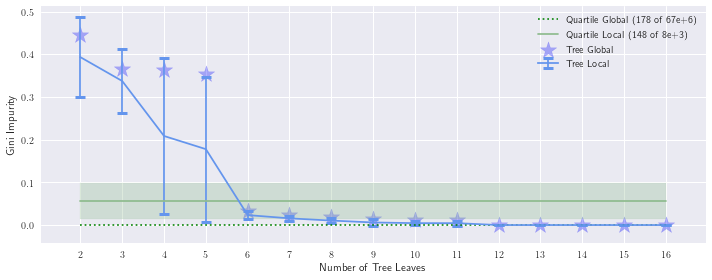

In [10]:
fig = plt.figure(figsize=(10, 4))  # constrained_layout=True

keys = sorted(list(tree_local.keys()))
x_local, y_local_mean, y_local_std = [], [], []
for key in keys:
    x_local.append(key)
    y_local_mean.append(np.mean(tree_local[key]))
    y_local_std.append(np.std(tree_local[key]))

plt.errorbar(x_local, y_local_mean, yerr=y_local_std,
             solid_capstyle='projecting', capsize=5, capthick=3,
             c='cornflowerblue',
             label='Tree Local')

keys = sorted(list(tree_global.keys()))
key_no = len(keys)
x_global, y_global = [], []
for key in keys:
    x_global.append(key)
    y_global.append(tree_global[key])
plt.scatter(x_global, y_global,
            marker='*', s=300, alpha=0.3, c='b',  # 'darkseagreen' # '-'
            label='Tree Global')

#############################################

mm, ms = np.mean(binary_results), np.std(binary_results)
pp = plt.plot(keys, key_no * [mm],  # LIME MSE
              c='darkseagreen',
              label=f'Quartile Local ({n_l} of {helpers.millify(n_l_fn)})')
lime_c = pp[-1].get_color()
plt.fill_between(keys, key_no * [mm - ms], key_no * [mm + ms],
                 alpha=0.3, color=lime_c)  # y + error

plt.plot(keys, key_no * [discrete_result],
         alpha=0.9, c='g', linestyle=':',
         label=f'Quartile Global ({n_g} of {helpers.millify(n_g_fn)})')

# Gini purity
plt.ylabel('Gini Impurity' if data_sets[data_set]['is_classification'] else
           'Mean Squared Error')
# Tree leaves
plt.xlabel('Number of Tree Leaves')

plt.xticks(np.arange(
    int(data_sets[data_set]['tree_leaves'] / 8),
    data_sets[data_set]['tree_leaves'] + 1,
    step=int(data_sets[data_set]['tree_leaves'] / 16)
))

plt.legend(loc='upper right')  # 'top right'

# Sort both labels and handles by labels
ax = fig.get_axes()[0]
handles, labels = ax.get_legend_handles_labels()
labels, handles = zip(*sorted(zip(labels, handles), key=lambda t: t[0]))
plt.legend(handles, labels)

plt.tight_layout()

plt.savefig(f'_figures/intrep_tab_{data_set}.pdf',
            transparent=False, dpi=300, bbox_inches='tight')